In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten ,Embedding,Reshape
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU ,regularizers
from keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook
import pandas as pd
import tensorflow as tf


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My\ Drive/faraji/digikala

/content/gdrive/My Drive/faraji/digikala


In [0]:
dic={0:'like' ,1:'verylike'}

In [0]:
df_cln= pd.read_csv('2-balance_classified_by.csv')

In [0]:
X = df_cln['comment']
X_train_0 = df_cln[ df_cln['class']==0]['comment']
X_train_1r = df_cln[ df_cln['class']==1]['comment']

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


data_d = tokenizer.texts_to_sequences(X_train_0)
latent = tokenizer.texts_to_sequences(X_train_1r)

X_train_0 = pad_sequences(data_d, padding = "post", maxlen =20)
X_train_1r = pad_sequences(latent, padding = "post", maxlen =20)



In [0]:
X_train_0.shape ,X_train_1r.shape 

((60716, 20), (60000, 20))

In [0]:
X_train_00=X_train_0[:50000]
X_valid_0=X_train_0[50000:]

X_train_11r=X_train_1r[:50000]
X_valid_1r=X_train_1r[50000:]

X_train_real= np.concatenate([X_train_11r,X_train_00])
X_valid_real = np.concatenate([X_valid_1r,X_valid_0])

In [0]:
X_train_00.shape , X_valid_0.shape ,X_train_11r.shape ,X_valid_1r.shape ,X_train_real.shape

((50000, 20), (10716, 20), (50000, 20), (10000, 20), (100000, 20))

In [0]:
noise=np.random.normal(0,1,(60000,20))

X_train_1f=noise[:50000]
X_valid_1f=noise[50000:]

X_train_fake = np.concatenate([X_train_1f,X_train_00])
X_valid_fake = np.concatenate([X_valid_1f,X_valid_0])

In [0]:
y_train_0=np.zeros(X_train_00.shape[0])
y_train_1=np.ones(X_train_1f.shape[0])
y_train = np.concatenate([y_train_1,y_train_0])

In [0]:
y_valid_0=np.zeros(X_valid_0.shape[0])
y_valid_1=np.ones(X_valid_1f.shape[0])
y_valid = np.concatenate([y_valid_1,y_valid_0])

In [0]:
X_train_00.shape , X_train_1f.shape ,  X_valid_0.shape ,X_valid_1f.shape  

((50000, 20), (50000, 20), (10716, 20), (10000, 20))

In [0]:
X_train_real.shape , X_valid_real.shape , X_train_fake.shape ,X_valid_fake.shape

((100000, 20), (20716, 20), (100000, 20), (20716, 20))

In [0]:
y_valid =tf.keras.utils. to_categorical(y_valid)
y_train =tf.keras.utils. to_categorical(y_train)

In [0]:
filter_sizes = [3, 4, 8]
def convolutionn():
    inn = Input(shape = (20, 20, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for  fs in filter_sizes:
        conv = Conv2D(filters = 150, kernel_size = (fs, 20), strides = 1, padding = "valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (20- fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [0]:
filter_sizes = [3, 4, 8]
def convolution():
    inn = Input(shape = (20, 20, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    # for fs in enumrate(filter_sizes):
    #     conv = Conv2D(filters = 150, kernel_size = (fs, 20), strides = 1, padding = "valid")(inn)
    #     nonlinearity = Activation('relu')(conv)
    #     maxpool = MaxPooling2D(pool_size = (20- fs + 1, 1), padding = "valid")(nonlinearity)
    #     convolutions.append(maxpool)
        
    # outt = concatenate(convolutions)
    # model = Model(inputs = inn, outputs = outt)


    conv_1 = Conv2D(filters = 150, kernel_size = (3, 20), strides = 1, padding = "valid",name='layer_31',trainable=False)(inn)
    nonlinearity_1 = Activation('relu',name='layer_32',trainable=False)(conv_1)
    maxpool_1 = MaxPooling2D(pool_size = (20- 3+ 1, 1), padding = "valid",name='layer_33',trainable=False)(nonlinearity_1)
    convolutions.append(maxpool_1)

    conv_2 = Conv2D(filters = 150, kernel_size = (4, 20), strides = 1, padding = "valid",name='layer_34',trainable=False)(inn)
    nonlinearity_2 = Activation('relu',name='layer_35',trainable=False)(conv_2)
    maxpool_2 = MaxPooling2D(pool_size = (20- 4+ 1, 1), padding = "valid",name='layer_36',trainable=False)(nonlinearity_2)
    convolutions.append(maxpool_2)  


    conv_3 = Conv2D(filters = 150, kernel_size = (8, 20), strides = 1, padding = "valid",name='layer_37',trainable=False)(inn)
    nonlinearity_3 = Activation('relu',name='layer_38',trainable=False)(conv_3)
    maxpool_3 = MaxPooling2D(pool_size = (20- 8+ 1, 1), padding = "valid",name='layer_39',trainable=False)(nonlinearity_3)
    convolutions.append(maxpool_3)  

    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
    return model     


In [0]:
model_first = Sequential()
model_first.add(Dense(36,input_shape=(20,)))
model_first.add(Reshape((6, 6),input_shape=(36,1)))
model_first.add(LSTM(256, input_shape=(6,6)))
# model.add(Reshape(256,1),input_shape=(256,1))
model_first.add(Dense(400, activation='softmax'))
model_first.add(Reshape((20,20,1),input_shape=(400,1)))
model_first.add(convolutionn())

model_first.add(Flatten())
model_first.add(Dense(20*20, activation='softmax'))
model_first.add(Reshape((20, 20),input_shape=(400,1)))





model_first.add(Reshape((20, 20, 1), input_shape = (20,20 ),name='layer_1',trainable=False))
model_first.add(Dropout(0.5 ,name='layer_2',trainable=False))

    # call convolution method defined above
    #start of freez layer
    
model_first.add(convolutionn())
    
model_first.add(Flatten(name='layer_4',trainable=False))
model_first.add(Dense(500, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01) ,name='layer_5',trainable=False))
model_first.add(BatchNormalization(name='layer_6',trainable=False))
model_first.add(Activation('relu' ,  name='layer_7',trainable=False))
model_first.add(Dropout(0.5 , name='layer_8',trainable=False))
model_first.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01), name='layer_9',trainable=False))
model_first.add(Activation('relu' , name='layer_10',trainable=False))
model_first.add(BatchNormalization(name='layer_11',trainable=False))
model_first.add(Dropout(0.5 , name='layer_12',trainable=False))
model_first.add(Dense(2))
model_first.add(Activation('softmax'))

adam =Adam(lr = 0.00001)


model_first.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
# model_first.summary () 






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model_first.load_weights('model_weights_2class.h5', by_name=True)

In [0]:
# model.get_layer(name='embed').get_weights()
model_first.get_layer(name='layer_1').get_weights()
model_first.get_layer(name='layer_2').get_weights()
# model_first.get_layer(name='layer_32').get_weights()
model_first.get_layer(name='layer_4').get_weights()
model_first.get_layer(name='layer_5').get_weights()
model_first.get_layer(name='layer_6').get_weights()
model_first.get_layer(name='layer_7').get_weights()
model_first.get_layer(name='layer_8').get_weights()
model_first.get_layer(name='layer_9').get_weights()
model_first.get_layer(name='layer_10').get_weights()
model_first.get_layer(name='layer_11').get_weights()
model_first.get_layer(name='layer_12').get_weights()

[]

In [0]:
history = model_first.fit(X_train_fake,
                  y_train,
                    batch_size = 100,
                    validation_split = 0.2,
                    epochs = 10, verbose = 1
                    )

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 56s 697us/step - loss: 120.6472 - acc: 0.9987 - val_loss: 120.6399 - val_acc: 0.9999
Epoch 2/10
80000/80000 [==============================] - 55s 688us/step - loss: 120.6453 - acc: 0.9992 - val_loss: 120.6398 - val_acc: 0.9999
Epoch 3/10
80000/80000 [==============================] - 55s 688us/step - loss: 120.6441 - acc: 0.9996 - val_loss: 120.6397 - val_acc: 0.9999
Epoch 4/10
80000/80000 [==============================] - 55s 691us/step - loss: 120.6434 - acc: 0.9997 - val_loss: 120.6397 - val_acc: 0.9999
Epoch 5/10
80000/80000 [==============================] - 55s 688us/step - loss: 120.6430 - acc: 0.9998 - val_loss: 120.6397 - val_acc: 0.9999
Epoch 6/10
80000/80000 [==============================] - 55s 693us/step - loss: 120.6426 - acc: 0.9998 - val_loss: 120.6397 - val_acc: 0.9999
Epoch 7/10
80000/80000 [==============================] - 57s 709us/step - loss: 120.6424 - 

In [0]:
model_first.evaluate(X_valid_fake,y_valid)

20716/20716 [==============================] - 6s 285us/step


[120.63998006057224, 1.0]

In [0]:
model = Sequential()
model.add(Embedding(input_dim =53019, output_dim = 20, input_length = 20,name='embed',trainable=False))
model.add(Reshape((20, 20, 1), input_shape = (20,20 ),name='layer_1',trainable=False))
model.add(Dropout(0.5 ,name='layer_2',trainable=False))
    # call convolution method defined above
model.add(convolutionn())



model.add(Flatten(name='layer_4',trainable=False))
model.add(Dense(500, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01),name='layer_5',trainable=False))
model.add(BatchNormalization(name='layer_6',trainable=False))
model.add(Activation('relu',name='layer_7',trainable=False))
model.add(Dropout(0.5,name='layer_8',trainable=False))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01),name='layer_9',trainable=False))
model.add(Activation('relu',name='layer_10',trainable=False))
model.add(BatchNormalization(name='layer_11',trainable=False))
model.add(Dropout(0.5 ,name='layer_12',trainable=False))
model.add(Dense(2))
model.add(Activation('sigmoid'))

adam =Adam(lr = 0.00001)


model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
model.summary ()    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 20, 20)            1060380   
_________________________________________________________________
layer_1 (Reshape)            (None, 20, 20, 1)         0         
_________________________________________________________________
layer_2 (Dropout)            (None, 20, 20, 1)         0         
_________________________________________________________________
model_3 (Model)              (None, 1, 1, 450)         45450     
_________________________________________________________________
layer_4 (Flatten)            (None, 450)               0         
_________________________________________________________________
layer_5 (Dense)              (None, 500)               225500    
_________________________________________________________________
layer_6 (BatchNormalization) (None, 500)              

In [0]:
model.load_weights('model_weights_2class.h5', by_name=True)

In [0]:
model.get_layer(name='embed').get_weights()

model.get_layer(name='layer_1').get_weights()
model.get_layer(name='layer_2').get_weights()
# model.get_layer(name='layer_32').get_weights()
model.get_layer(name='layer_4').get_weights()
model.get_layer(name='layer_5').get_weights()
model.get_layer(name='layer_6').get_weights()
model.get_layer(name='layer_7').get_weights()
model.get_layer(name='layer_8').get_weights()
model.get_layer(name='layer_9').get_weights()
model.get_layer(name='layer_10').get_weights()
model.get_layer(name='layer_11').get_weights()
model.get_layer(name='layer_12').get_weights()

[]

In [0]:
model_first.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 36)                756       
_________________________________________________________________
reshape_5 (Reshape)          (None, 6, 6)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               269312    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               102800    
_________________________________________________________________
reshape_6 (Reshape)          (None, 20, 20, 1)         0         
_________________________________________________________________
model_3 (Model)              (None, 1, 1, 450)         45450     
_________________________________________________________________
flatten_3 (Flatten)          (None, 450)              

In [0]:
# pad_size=20
# adam =Adam(lr = 0.000001)
# inputs_1 = Input(shape=(pad_size, ))
# inputs_2=Input(shape=(pad_size, ))
# output_1 = model(inputs_1)
# output_2 = model_first(inputs_2)

# # mergedOut = Add()([output_1, output_2])
# # mergedOut = Dropout(.5)(mergedOut)
# # mergedOut = Dense(1, activation='softmax')(mergedOut)
# gan = Model([inputs_1,inputs_2], [output_1,output_2])
# gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# gan.summary()

Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_60 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
input_61 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
sequential_29 (Sequential)      (None, 2)            1358682     input_60[0][0]                   
__________________________________________________________________________________________________
sequential_28 (Sequential)      (None, 2)            897020      input_61[0][0]                   
Total params: 2,255,702
Trainable params: 689,822
Non-trainable params: 1,565,880
_________

In [0]:
pad_size=20
adam =Adam(lr = 0.00001)
inputs_1 = Input(shape=(pad_size, ))
inputs_2=Input(shape=(pad_size, ))

output_1 = model(inputs_1)
output_2 = model_first(inputs_2)

mergedOut = Add()([output_1, output_2])
mergedOut = Dropout(.5)(mergedOut)
mergedOut = Dense(2, activation='softmax')(mergedOut)

gan = Model([inputs_1,inputs_2],mergedOut )
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# gan.summary()

In [0]:
history = gan.fit([X_train_real,X_train_fake],
                  y_train,
                    batch_size = 100,
                    validation_split = 0.2,
                    epochs = 50, verbose = 1
                    )

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
80000/80000 [==============================] - 61s 768us/step - loss: 242.8714 - acc: 0.4985 - val_loss: 241.3847 - val_acc: 1.0000
Epoch 2/50
80000/80000 [==============================] - 61s 765us/step - loss: 242.8291 - acc: 0.4996 - val_loss: 241.3703 - val_acc: 1.0000
Epoch 3/50
80000/80000 [==============================] - 62s 771us/step - loss: 242.7645 - acc: 0.5008 - val_loss: 241.3703 - val_acc: 1.0000
Epoch 4/50
80000/80000 [==============================] - 62s 772us/step - loss: 242.7050 - acc: 0.4993 - val_loss: 241.3871 - val_acc: 1.0000
Epoch 5/50
80000/80000 [==============================] - 61s 768us/step - loss: 242.6592 - acc: 0.4996 - val_loss: 241.4112 - val_acc: 1.0000
Epoch 6/50
80000/80000 [==============================] - 61s 767us/step - loss: 242.6208 - acc: 0.5013 - val_loss: 241.4485 - val_acc: 1.0000
Epoch 7/50
80000/80000 [==============================] - 61s 766us/step - loss: 242.5782 - 

In [0]:
gan.evaluate([X_valid_real,X_valid_fake],y_valid)

20716/20716 [==============================] - 6s 271us/step


[241.58894749427998, 1.0]

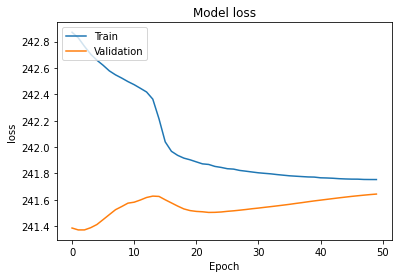

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'] , loc='upper left')
plt.show()